# Project Plotting
This file is meant to generate seaborn plots from the master wrangled dataset


In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats
import matplotlib.pyplot as plt

sns.set_theme()

In [22]:
master_data = pd.read_csv("./nba_data_master.csv")

master_data['utility_per_mil'] = master_data['player_utility'] / ((master_data['salary'])/1000000)
master_data.head(10)

,stage,team,player_key,league,salary,season,season_end,season_start,team.1,name,position,points_per_game,rebounds_per_game,assists_per_game,blocks_per_game,steals_per_game,turnovers_per_game,player_utility,player_value,utility_per_mil
0,Playoffs,LAL,Shaquille O'Neal (1999 - 2000),NBA,17142858,1999 - 2000,2000,1999,Los Angeles Lakers,Shaquille O'Neal,C,30.739130,15.434783,3.086957,2.391304,0.565217,2.434783,57.369565,3.346558,3.346558
1,Playoffs,IND,Reggie Miller (1999 - 2000),NBA,9031850,1999 - 2000,2000,1999,Indiana Pacers,Reggie Miller,SG,23.954545,2.409091,2.727273,0.454545,1.045455,1.272727,32.663636,3.616495,3.616495
2,Playoffs,IND,Jalen Rose (1999 - 2000),NBA,2437500,1999 - 2000,2000,1999,Indiana Pacers,Jalen Rose,SF,20.826087,4.391304,3.391304,0.478261,0.695652,2.173913,31.356522,12.864214,12.864214
3,Playoffs,LAL,Kobe Bryant (1999 - 2000),NBA,9000000,1999 - 2000,2000,1999,Los Angeles Lakers,Kobe Bryant,SF,21.136364,4.454545,4.409091,1.454545,1.454545,2.500000,36.413636,4.045960,4.045960
4,Playoffs,NYK,Latrell Sprewell (1999 - 2000),NBA,9000000,1999 - 2000,2000,1999,New York Knicks,Latrell Sprewell,SF,18.687500,4.375000,3.500000,0.312500,1.125000,2.312500,29.750000,3.305556,3.305556
5,Playoffs,POR,Rasheed Wallace (1999 - 2000),NBA,10800000,1999 - 2000,2000,1999,Portland Trail Blazers,Rasheed Wallace,C,17.875000,7.062500,1.750000,1.250000,0.937500,1.437500,31.912500,2.954861,2.954861
6,Playoffs,LAL,Glen Rice (1999 - 2000),NBA,7000000,1999 - 2000,2000,1999,Los Angeles Lakers,Glen Rice,SG,12.391304,4.000000,2.086957,0.173913,0.652174,1.565217,20.408696,2.915528,2.915528
7,Playoffs,NYK,Allan Houston (1999 - 2000),NBA,8000000,1999 - 2000,2000,1999,New York Knicks,Allan Houston,SG,17.562500,3.250000,1.625000,0.187500,1.187500,2.250000,24.400000,3.050000,3.050000
8,Playoffs,POR,Steve Smith (1999 - 2000),NBA,7200000,1999 - 2000,2000,1999,Portland Trail Blazers,Steve Smith,SG,17.125000,2.500000,2.750000,0.250000,1.187500,1.687500,25.437500,3.532986,3.532986
9,Playoffs,UTA,Karl Malone (1999 - 2000),NBA,14000000,1999 - 2000,2000,1999,Utah Jazz,Karl Malone,SG,27.200000,8.900000,3.100000,0.700000,0.700000,2.700000,42.630000,3.045000,3.045000


In [23]:
df_1 = master_data[master_data['position'] != 'None']
df_pos_overall_means = df_1.groupby(['position'], as_index=False).mean()
# sns.scatterplot(data=df_pos_means, x='season_start', y='player_utility', hue='position')
# sns.catplot(data=df_pos_overall_means, x='position', y="player_utility", kind="box")

result = df_pos_overall_means[['position', 'player_utility', 'utility_per_mil']]
result

,position,player_utility,utility_per_mil
0,C,19.606918,5.179271
1,PF,20.628176,5.955451
2,PG,21.690228,13.700270
3,SF,21.495374,6.854470
4,SG,18.886084,7.355999


In [24]:
master_data['season_start'].max()


2017

In [25]:
# Most overpaid players

result = master_data.sort_values(by=["utility_per_mil"], ascending=True)
result.head()

,stage,team,player_key,league,salary,season,season_end,season_start,team.1,name,position,points_per_game,rebounds_per_game,assists_per_game,blocks_per_game,steals_per_game,turnovers_per_game,player_utility,player_value,utility_per_mil
2681,Playoffs,HOU,Ryan Anderson (2017 - 2018),NBA,19578455,2017 - 2018,2018,2017,Houston Rockets,Ryan Anderson,PF,1.727273,1.181818,0.545455,0.090909,0.272727,0.272727,4.418182,0.225665,0.225665
941,Playoffs,MIA,Shandon Anderson (2005 - 2006),NBA,7900000,2005 - 2006,2006,2005,New York Knicks,Shandon Anderson,SF,1.000000,0.923077,0.307692,0.076923,0.000000,0.461538,2.261538,0.286271,0.286271
1323,Playoffs,BOS,Stephon Marbury (2008 - 2009),NBA,20840625,2008 - 2009,2009,2008,New York Knicks,Stephon Marbury,PG,3.714286,0.928571,1.785714,0.000000,0.071429,0.714286,6.935714,0.332798,0.332798
527,Playoffs,SAS,Steve Smith (2002 - 2003),NBA,9900000,2002 - 2003,2003,2002,San Antonio Spurs,Steve Smith,SG,1.777778,0.777778,0.666667,0.000000,0.111111,0.222222,3.711111,0.374860,0.374860
520,Playoffs,ORL,Shawn Kemp (2002 - 2003),NBA,12621028,2002 - 2003,2003,2002,Portland Trail Blazers,Shawn Kemp,C,3.000000,2.142857,0.000000,0.000000,0.000000,0.571429,5.000000,0.396164,0.396164


In [26]:
# Most underpaid players

result = master_data.sort_values(by=["utility_per_mil"], ascending=False)
result.head()

,stage,team,player_key,league,salary,season,season_end,season_start,team.1,name,position,points_per_game,rebounds_per_game,assists_per_game,blocks_per_game,steals_per_game,turnovers_per_game,player_utility,player_value,utility_per_mil
2670,Playoffs,WAS,Ty Lawson (2017 - 2018),NBA,8313,2017 - 2018,2018,2017,Washington Wizards,Ty Lawson,PG,5.800000,2.60,3.000000,0.000000,0.600000,0.600000,14.020000,1686.515097,1686.515097
124,Playoffs,PHI,Kevin Ollie (1999 - 2000),NBA,2853,1999 - 2000,2000,1999,Dallas Mavericks,Kevin Ollie,PG,2.000000,0.50,1.200000,0.000000,0.200000,0.300000,4.500000,1577.287066,1577.287066
2525,Playoffs,MEM,Wayne Selden (2016 - 2017),NBA,31969,2016 - 2017,2017,2016,New Orleans Pelicans,Wayne Selden,SG,3.833333,1.50,1.166667,0.166667,0.166667,0.333333,7.716667,241.379670,241.379670
2469,Playoffs,IND,Lance Stephenson (2016 - 2017),NBA,144386,2016 - 2017,2017,2016,Minnesota Timberwolves,Lance Stephenson,SG,16.000000,5.25,2.750000,0.000000,0.500000,1.000000,26.425000,183.016359,183.016359
2524,Playoffs,MEM,Wayne Selden (2016 - 2017),NBA,83119,2016 - 2017,2017,2016,Memphis Grizzlies,Wayne Selden,SG,3.833333,1.50,1.166667,0.166667,0.166667,0.333333,7.716667,92.838781,92.838781


In [27]:
df_salary_filter = master_data[master_data['salary'] > 1000000]

# Most overpaid players Filtered by salary (> 1 mil)

result = df_salary_filter.sort_values(by=["utility_per_mil"], ascending=True)
result.head()

,stage,team,player_key,league,salary,season,season_end,season_start,team.1,name,position,points_per_game,rebounds_per_game,assists_per_game,blocks_per_game,steals_per_game,turnovers_per_game,player_utility,player_value,utility_per_mil
2681,Playoffs,HOU,Ryan Anderson (2017 - 2018),NBA,19578455,2017 - 2018,2018,2017,Houston Rockets,Ryan Anderson,PF,1.727273,1.181818,0.545455,0.090909,0.272727,0.272727,4.418182,0.225665,0.225665
941,Playoffs,MIA,Shandon Anderson (2005 - 2006),NBA,7900000,2005 - 2006,2006,2005,New York Knicks,Shandon Anderson,SF,1.000000,0.923077,0.307692,0.076923,0.000000,0.461538,2.261538,0.286271,0.286271
1323,Playoffs,BOS,Stephon Marbury (2008 - 2009),NBA,20840625,2008 - 2009,2009,2008,New York Knicks,Stephon Marbury,PG,3.714286,0.928571,1.785714,0.000000,0.071429,0.714286,6.935714,0.332798,0.332798
527,Playoffs,SAS,Steve Smith (2002 - 2003),NBA,9900000,2002 - 2003,2003,2002,San Antonio Spurs,Steve Smith,SG,1.777778,0.777778,0.666667,0.000000,0.111111,0.222222,3.711111,0.374860,0.374860
520,Playoffs,ORL,Shawn Kemp (2002 - 2003),NBA,12621028,2002 - 2003,2003,2002,Portland Trail Blazers,Shawn Kemp,C,3.000000,2.142857,0.000000,0.000000,0.000000,0.571429,5.000000,0.396164,0.396164


In [28]:
# Most underpaid players filtered by salary (> 1 mil)

result = df_salary_filter.sort_values(by=["utility_per_mil"], ascending=False)
result.head()

,stage,team,player_key,league,salary,season,season_end,season_start,team.1,name,position,points_per_game,rebounds_per_game,assists_per_game,blocks_per_game,steals_per_game,turnovers_per_game,player_utility,player_value,utility_per_mil
1242,Playoffs,BOS,Rajon Rondo (2008 - 2009),NBA,1315080,2008 - 2009,2009,2008,Boston Celtics,Rajon Rondo,PG,16.857143,9.714286,9.785714,0.214286,2.500000,2.714286,45.907143,34.908251,34.908251
818,Playoffs,PHX,Boris Diaw (2005 - 2006),NBA,1174200,2005 - 2006,2006,2005,Phoenix Suns,Boris Diaw,PF,18.700000,6.650000,5.200000,1.100000,0.900000,2.750000,35.730000,30.429228,30.429228
1957,Playoffs,IND,Lance Stephenson (2013 - 2014),NBA,1005000,2013 - 2014,2014,2013,Indiana Pacers,Lance Stephenson,SG,13.631579,6.894737,4.210526,0.210526,0.842105,2.421053,27.905263,27.766431,27.766431
670,Playoffs,DET,Tayshaun Prince (2004 - 2005),NBA,1038960,2004 - 2005,2005,2004,Detroit Pistons,Tayshaun Prince,SF,13.440000,6.320000,3.320000,0.360000,1.040000,1.480000,27.324000,26.299376,26.299376
989,Playoffs,DAL,Josh Howard (2006 - 2007),NBA,1667603,2006 - 2007,2007,2006,Dallas Mavericks,Josh Howard,SF,21.333333,9.833333,2.833333,0.833333,2.166667,2.000000,41.383333,24.816058,24.816058


In [109]:
# Data 2012 to 2017 Avg Utility
df_12_17 = df_salary_filter[df_salary_filter['season_start'] >= 2012]
df_07_17 = df_salary_filter[df_salary_filter['season_start'] >= 2007]
df_12_17 = df_12_17[df_12_17['season_start'] <= 2017]
df_07_17 = df_07_17[df_07_17['position'] != "None"]
df_12_17 = df_12_17[df_12_17['position'] != "None"]

print(np.shape(df_12_17))

result = df_12_17.groupby(by=["position"], as_index=False).mean()
result = result[['position', 'player_utility', 'utility_per_mil']]
result

# new_df = df_12_17.groupby(by="position").count()
# new_df

(802, 20)


,position,player_utility,utility_per_mil
0,C,20.360084,4.068381
1,PF,20.180054,3.752361
2,PG,24.636657,5.208172
3,SF,22.307272,4.584415
4,SG,18.588039,4.223298


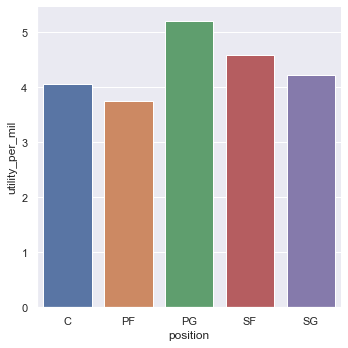

In [110]:
barPlot = sns.catplot(data=result, x='position', y='utility_per_mil', kind='bar')

In [111]:
result = df_12_17.sort_values(by=["utility_per_mil"], ascending=False)
result.head(10)

,stage,team,player_key,league,salary,season,season_end,season_start,team.1,name,position,points_per_game,rebounds_per_game,assists_per_game,blocks_per_game,steals_per_game,turnovers_per_game,player_utility,player_value,utility_per_mil
1957,Playoffs,IND,Lance Stephenson (2013 - 2014),NBA,1005000,2013 - 2014,2014,2013,Indiana Pacers,Lance Stephenson,SG,13.631579,6.894737,4.210526,0.210526,0.842105,2.421053,27.905263,27.766431,27.766431
1829,Playoffs,CHI,Jimmy Butler (2012 - 2013),NBA,1097520,2012 - 2013,2013,2012,Chicago Bulls,Jimmy Butler,SF,13.333333,5.166667,2.666667,0.500000,1.250000,1.333333,25.700000,23.416430,23.416430
1824,Playoffs,CHI,Nate Robinson (2012 - 2013),NBA,1146337,2012 - 2013,2013,2012,Chicago Bulls,Nate Robinson,PG,16.250000,2.666667,4.416667,0.166667,1.000000,2.666667,25.741667,22.455584,22.455584
2028,Playoffs,CHI,Jimmy Butler (2013 - 2014),NBA,1112880,2013 - 2014,2014,2013,Chicago Bulls,Jimmy Butler,SF,13.600000,5.200000,2.200000,0.000000,1.200000,0.600000,24.940000,22.410323,22.410323
2426,Playoffs,HOU,Clint Capela (2016 - 2017),NBA,1296240,2016 - 2017,2017,2016,Houston Rockets,Clint Capela,C,10.545455,8.727273,1.090909,2.545455,0.727273,0.727273,28.472727,21.965629,21.965629
2468,Playoffs,IND,Lance Stephenson (2016 - 2017),NBA,1227286,2016 - 2017,2017,2016,New Orleans Pelicans,Lance Stephenson,SG,16.000000,5.250000,2.750000,0.000000,0.500000,1.000000,26.425000,21.531249,21.531249
2173,Playoffs,DAL,J.J. Barea (2014 - 2015),NBA,1310286,2014 - 2015,2015,2014,Dallas Mavericks,J.J. Barea,PG,11.800000,4.800000,7.400000,0.000000,0.800000,2.800000,27.460000,20.957257,20.957257
2296,Playoffs,POR,Mason Plumlee (2015 - 2016),NBA,1415520,2015 - 2016,2016,2015,Portland Trail Blazers,Mason Plumlee,C,7.000000,11.818182,4.818182,1.000000,0.636364,2.272727,29.409091,20.776175,20.776175
1835,Playoffs,OKC,Reggie Jackson (2012 - 2013),NBA,1243080,2012 - 2013,2013,2012,Oklahoma City Thunder,Reggie Jackson,PG,13.909091,4.909091,3.636364,0.545455,0.454545,1.909091,25.345455,20.389238,20.389238
2093,Playoffs,CHI,Jimmy Butler (2014 - 2015),NBA,2008748,2014 - 2015,2015,2014,Chicago Bulls,Jimmy Butler,SF,22.916667,5.583333,3.166667,0.750000,2.416667,1.750000,38.950000,19.390187,19.390187


In [112]:
result = df_12_17.sort_values(by=["utility_per_mil"], ascending=True)
result.head(10)

,stage,team,player_key,league,salary,season,season_end,season_start,team.1,name,position,points_per_game,rebounds_per_game,assists_per_game,blocks_per_game,steals_per_game,turnovers_per_game,player_utility,player_value,utility_per_mil
2681,Playoffs,HOU,Ryan Anderson (2017 - 2018),NBA,19578455,2017 - 2018,2018,2017,Houston Rockets,Ryan Anderson,PF,1.727273,1.181818,0.545455,0.090909,0.272727,0.272727,4.418182,0.225665,0.225665
2070,Playoffs,LAC,Danny Granger (2013 - 2014),NBA,14021788,2013 - 2014,2014,2013,Philadelphia 76ers,Danny Granger,SF,2.615385,1.538462,0.230769,0.076923,0.461538,0.230769,5.653846,0.403219,0.403219
2226,Playoffs,CLE,Mike Miller (2014 - 2015),NBA,6600000,2014 - 2015,2015,2014,Miami Heat,Mike Miller,SF,1.000000,1.111111,0.000000,0.111111,0.111111,0.111111,2.666667,0.404040,0.404040
2536,Playoffs,GSW,Matt Barnes (2016 - 2017),NBA,6125000,2016 - 2017,2017,2016,Sacramento Kings,Matt Barnes,SF,0.750000,0.750000,0.583333,0.000000,0.166667,0.250000,2.608333,0.425850,0.425850
2369,Playoffs,GSW,Anderson Varejao (2015 - 2016),NBA,9638554,2015 - 2016,2016,2015,Portland Trail Blazers,Anderson Varejao,C,1.176471,1.235294,0.764706,0.117647,0.117647,0.117647,4.158824,0.431478,0.431478
2376,Playoffs,IND,Ty Lawson (2015 - 2016),NBA,12404495,2015 - 2016,2016,2015,Houston Rockets,Ty Lawson,PG,2.285714,1.000000,1.428571,0.000000,0.428571,0.857143,5.628571,0.453753,0.453753
2201,Playoffs,GSW,David Lee (2014 - 2015),NBA,15012000,2014 - 2015,2015,2014,Golden State Warriors,David Lee,PF,3.076923,2.615385,0.615385,0.153846,0.230769,0.153846,7.753846,0.516510,0.516510
2675,Playoffs,MIA,Hassan Whiteside (2017 - 2018),NBA,23775506,2017 - 2018,2018,2017,Miami Heat,Hassan Whiteside,C,5.200000,6.000000,0.200000,1.200000,0.000000,2.400000,12.700000,0.534163,0.534163
2641,Playoffs,BOS,Greg Monroe (2017 - 2018),NBA,16384175,2017 - 2018,2018,2017,Phoenix Suns,Greg Monroe,C,4.818182,3.181818,0.454545,0.181818,0.181818,1.272727,8.772727,0.535439,0.535439
2508,Playoffs,BOS,Amir Johnson (2016 - 2017),NBA,12000000,2016 - 2017,2017,2016,Boston Celtics,Amir Johnson,PF,2.571429,2.142857,0.214286,0.428571,0.285714,0.428571,6.464286,0.538690,0.538690


# Plotting

In [113]:
stat, p = scipy.stats.shapiro(df_07_17['player_value'])
print(p)
# If p < 0.05, there is evidence to suggest the data is not normally distributed

1.5387658436750816e-41


<AxesSubplot:xlabel='player_value', ylabel='Count'>

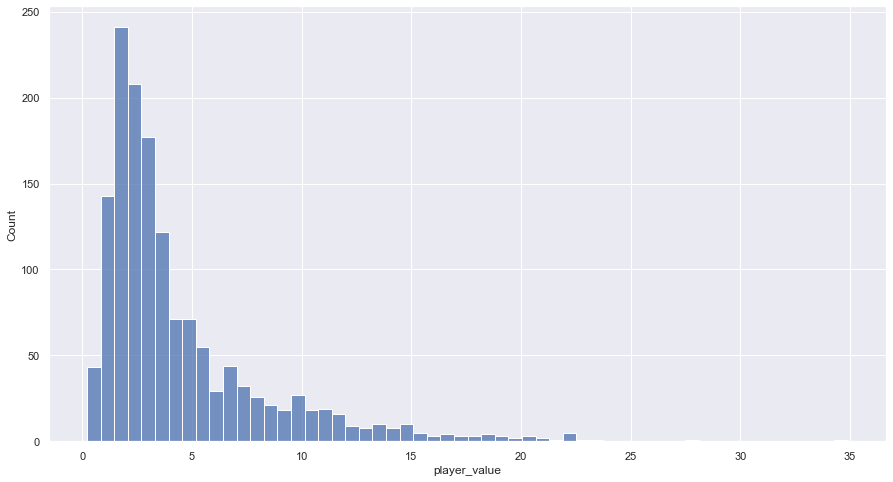

In [114]:
sns.histplot(data=df_07_17, x='player_value')

In [115]:
data=df_07_17['player_value']
mu = data.mean()
sigma = data.std()
n = data.size
print("mu: {}, sigma: {}, n: {}".format(mu, sigma, n))

mu: 4.480217326056036, sigma: 4.024223889306645, n: 1468


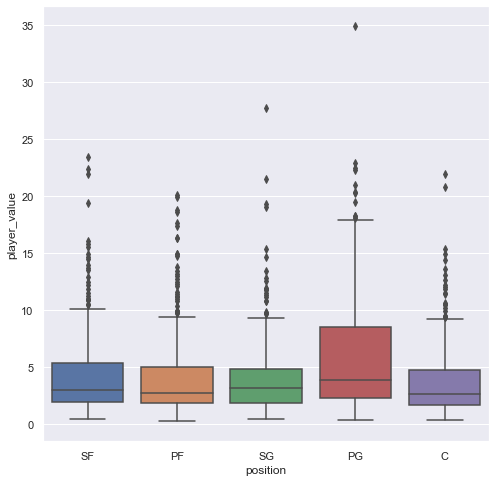

In [116]:
# Box-and-Whisker Plot of player value per position, and that over time
sns.set(rc = {'figure.figsize':(8,8)})
ax1 = sns.boxplot(data=df_07_17, y='player_value', x='position')
plt.savefig("images/boxplot_position.png")

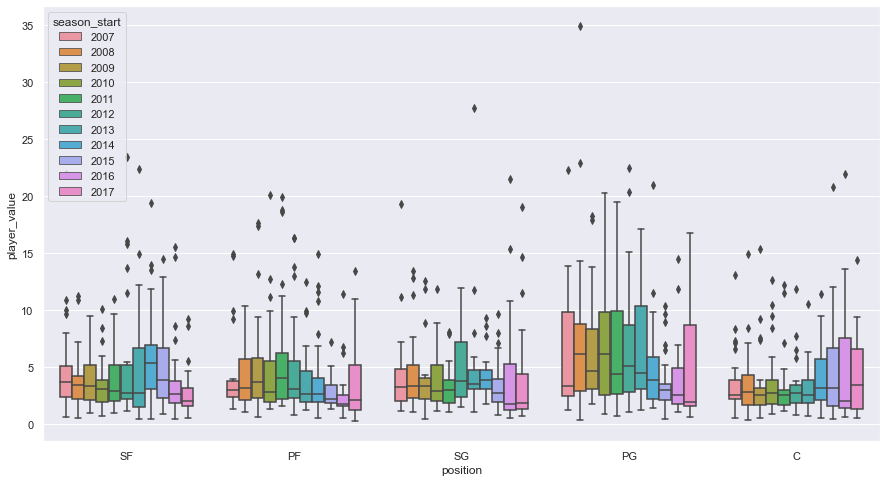

In [118]:
sns.set(rc = {'figure.figsize':(15,8)})
ax = sns.boxplot(data=df_07_17, y='player_value', x='position', hue='season_start')
# plt.savefig("images/boxplot_position_season.png")

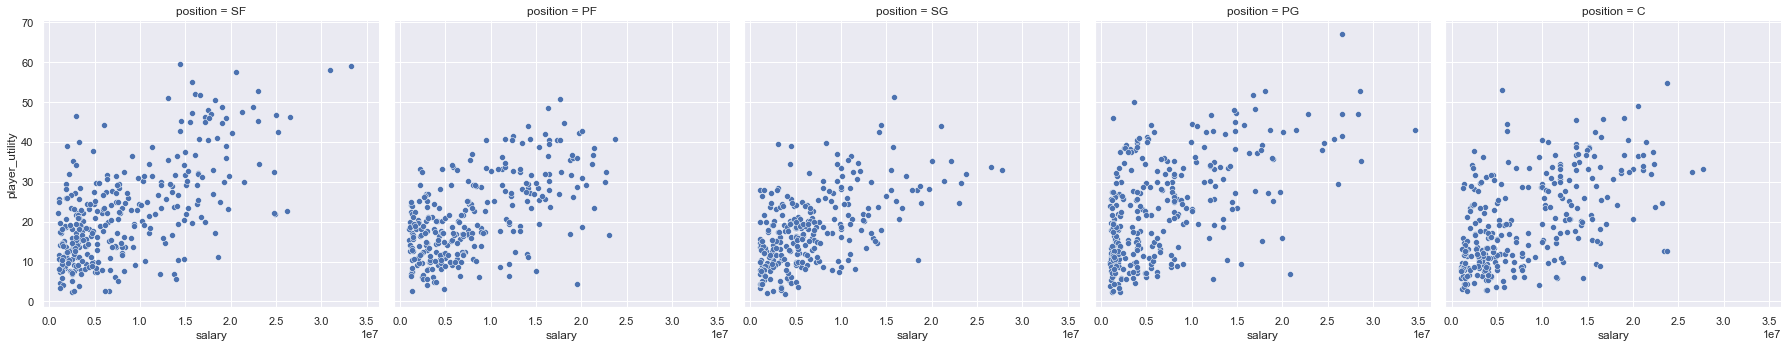

In [126]:
# ax = sns.boxplot(data=df_07_17, x='player_value', y='player_value', hue='season_start', col='position')
sns.relplot(data=df_07_17, x='salary', y='player_utility', col='position')

In [107]:
year_means = df_07_17[['player_value', 'season_start']].groupby(by="season_start", as_index=False).mean()
print(year_means)
sns.relplot(dat=year_means, x='season_start', y='player_value')

    season_start  player_value
0           2007      4.636717
1           2008      4.692117
2           2009      4.498599
3           2010      4.643718
4           2011      4.537444
5           2012      5.101681
6           2013      4.759949
7           2014      4.686147
8           2015      3.984396
9           2016      3.881539
10          2017      3.949599
<class 'numpy.int64'>


ValueError: Could not interpret value `season_start` for parameter `x`